In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
df=pd.read_csv("Train.csv")
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [146]:
dftest=pd.read_csv("Test.csv")

In [147]:
x=[]
x.append(df['feature_1'].values)
x.append(df['feature_2'].values)
x.append(df['feature_3'].values)
x.append(df['feature_4'].values)
x.append(df['feature_5'].values)

In [148]:
x_test=[]
x_test.append(dftest['feature_1'].values)
x_test.append(dftest['feature_2'].values)
x_test.append(dftest['feature_3'].values)
x_test.append(dftest['feature_4'].values)
x_test.append(dftest['feature_5'].values)

In [149]:
y=df['target'].values

In [150]:
xtrain=pd.DataFrame(np.matrix.transpose(np.array(x)))
xtrain['y']=y
xtrain.head()

,0,1,2,3,4,y
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


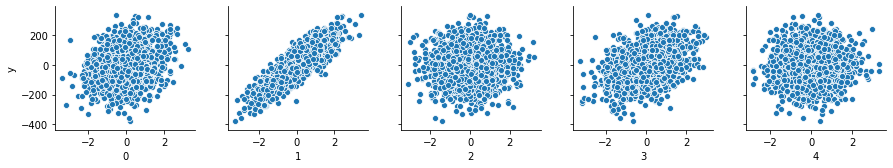

In [151]:
sns.pairplot(xtrain,x_vars=[0,1,2,3,4],y_vars=['y'])

In [152]:
def hypothesis(x,i,theta):
    hx=theta[0]
    for j in range(0,5):
        hx+=theta[j+1]*x[j][i]
    return hx

In [153]:
def error(x,y,theta):
    err=0
    for i in range(0,x[0].shape[0]):
        err+=(y[i]-hypothesis(x,i,theta))**2
    return err

In [154]:
def gradient(x,y,theta):
    grad=np.zeros((6,))
    for i in range(0,x[0].shape[0]):
        hx=hypothesis(x,i,theta)
        grad[0]+=hx-y[i]
        for j in range(0,5):
            grad[j+1]=(hx-y[i])*x[j][i]
    return grad

In [165]:
def gradientDescent(x,y,learningRate=0.001):
    theta=np.array([-400.0,0.0,0.0,0.0,0.0,0.0])
    itr=100
    errorList=[]
    thetaList=[]
    for i in range(0,itr):
        err=error(x,y,theta)
        errorList.append(err)
        thetaList.append(theta)
        grad=gradient(x,y,theta)
        for j in range(0,6):
            theta[j]-=learningRate*grad[j]
    return theta,errorList,thetaList

In [166]:
opt_theta,errorList,thetaList=gradientDescent(x,y)

In [167]:
opt_theta

array([  0.90902925,  14.48712373,   6.53171901,  11.16731286,
        -3.75721716, -11.22348849])

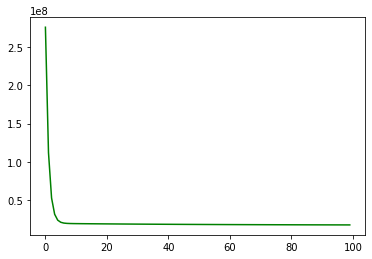

In [168]:
plt.plot(errorList,color='green')
plt.show()

In [169]:
hx=np.zeros((x_test[0].shape[0],))
for i in range(0,x_test[0].shape[0]):
    hx[i]+=hypothesis(x_test,i,opt_theta)   

In [171]:
print(hx)

[ 4.62929377e+01  1.00439766e+01 -1.03137030e+01 -7.85752200e+00
  2.49803639e+00  2.46613069e+01 -8.29447921e+00 -8.96317523e+00
  7.83138089e+00  3.08726192e+01 -7.02677498e+00 -2.41347457e+01
  3.68428918e+00  3.76842069e+01  1.50842210e+01 -1.68050451e+01
  2.95383070e+01  4.11271296e+01 -1.17614626e+01  3.69465514e+01
 -1.12240458e+01 -4.84958280e+00 -1.75102019e+01  2.13802590e+01
 -5.25453163e+01 -1.02360783e+01  1.99943568e+01 -1.04312831e+01
  2.87938987e+01  7.66271670e+00 -1.91167329e+01 -1.56359532e+00
  5.08847606e+00  4.96785251e+01 -1.56857823e+01  3.05823755e+01
  3.78146623e+01  9.34636399e+00 -5.10122563e+01 -1.46730574e+01
  2.58786378e+00 -2.17551923e+01 -3.11511078e+01  9.42887988e+00
 -4.66632175e+01  7.48679223e+01 -1.49801128e+01  2.21909454e+01
 -4.41221129e+00 -4.57064492e+00 -1.10353590e+01 -2.43712042e-01
  4.36358538e+00  8.44669324e-01 -2.14856599e+01  1.11571170e+01
 -1.02302521e+01  1.28541593e+01 -3.30073011e+00 -1.50545299e+01
  9.75649823e+00 -1.17911

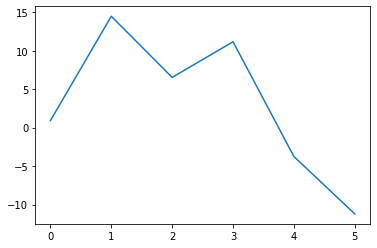

In [172]:
plt.plot(opt_theta)